<a href="https://colab.research.google.com/github/sheilambadi/100-days-of-code/blob/master/smbadiSheilaMbadiBDSassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Big Data Science/1"

RwandaDistrictCentroidsLongitude-Latitude.csv
RwandaDistrictRainfall.csv
RwandaDistrictVegetation.csv
smbadiSheilaMbadiBDSassignment1.ipynb


In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/Big Data Science/1/RwandaDistrictVegetation.csv" RwandaDistrictVegetation.csv
!cp "/content/drive/My Drive/Colab Notebooks/Big Data Science/1/RwandaDistrictRainfall.csv" RwandaDistrictRainfall.csv
!cp "/content/drive/My Drive/Colab Notebooks/Big Data Science/1/RwandaDistrictCentroidsLongitude-Latitude.csv" RwandaDistrictCentroidsLongitude-Latitude.csv

In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('ggplot')

from sklearn.neighbors import DistanceMetric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy.optimize import curve_fit

import calendar

import warnings
warnings.filterwarnings('ignore')

##Question 1

**Load district rainfall data and clean it up**

In [0]:
# load measurement of rainfall data
rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')

# Transpose data
rainfall_data = rainfall_data.T

# make first row the header
header = rainfall_data.iloc[0] 
rainfall_data = rainfall_data[1:] 
rainfall_data.columns = header 

# create dates from 2000 to 2014
dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
dates = pd.to_datetime(dates)

# add date column to data and set as new index
rainfall_data.insert(1, 'Dates', dates)

# drop colums that are missing in vegetation data
rainfall_data = rainfall_data.iloc[4:]
rainfall_data.head()

# reorder data
rainfall_data = rainfall_data.iloc[:,1:]
rainfall_data.head()

Year,Dates,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,2000-05-31,84.4,74.9,84.6,82.4,74.4,88.2,82.4,81.4,83.5,82.4,81.0,88.2,85.8,88.2,77.3,75.3,88.2,83.8,81.7,86.5,78.3,81.6,85.9,75.9,87.4,74.5,79.7,82.4,79.4,71.2
Unnamed: 6,2000-06-30,15.6,17.6,17.2,17.6,17.6,11.8,17.6,17.6,16.5,17.6,11.8,11.8,11.8,11.8,16.8,16.7,11.8,11.8,11.8,12.1,11.8,13.6,11.8,11.8,11.8,17.6,14.4,11.8,13.7,14.4
Unnamed: 7,2000-07-31,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
Unnamed: 8,2000-08-31,17.6,23.5,21.8,17.6,21.4,17.6,17.6,18.6,17.6,17.6,17.8,17.6,17.6,17.6,23.5,22.6,17.6,17.6,17.6,19.1,16.5,22.0,17.6,16.4,18.3,21.6,20.3,17.6,18.6,17.6
Unnamed: 9,2000-09-30,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,31.7,29.4,35.7,29.4,35.9,30.7,29.4,29.4,26.8,30.9,28.0,38.2,29.4,28.2,41.0,29.4,29.4,29.4,29.4,26.5


**Load district vegetation data and clean it**

In [0]:
# load enhanced vegetation index data
vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

# Transpose data
vegetation_data = vegetation_data.T

# make first row the header
header = vegetation_data.iloc[0] 
vegetation_data = vegetation_data[1:] 
vegetation_data.columns = header 

# create dates from 2000 to 2014
dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
dates = pd.to_datetime(dates)

# add date column to data and set as new index
vegetation_data.insert(1, 'Dates', dates)

# reorder data
vegetation_data = vegetation_data.iloc[:,1:]

vegetation_data.head()

Unnamed: 0,Dates,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
2000,2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,2000-05-31,127.1335578,134.2743651,127.1976424,130.4075654,124.8776285,129.6223645,126.3618628,128.071805,132.4418465,131.4451902,135.7129327,131.6895246,137.9389093,139.308084,137.2724739,140.5128836,133.3400198,132.4728571,139.283696,118.1757115,135.7148967,134.2768639,137.6364188,122.2385145,125.5538834,125.8901102,113.814089,110.6276226,129.7890721,108.3154009


In [0]:
# Drop Nans
vegetation_data = vegetation_data.dropna()
vegetation_data.head()

Unnamed: 0,Dates,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,2000-05-31,127.1335578,134.2743651,127.1976424,130.4075654,124.8776285,129.6223645,126.3618628,128.071805,132.4418465,131.4451902,135.7129327,131.6895246,137.9389093,139.308084,137.2724739,140.5128836,133.3400198,132.4728571,139.283696,118.1757115,135.7148967,134.2768639,137.6364188,122.2385145,125.5538834,125.8901102,113.814089,110.6276226,129.7890721,108.3154009
Unnamed: 6,2000-06-30,114.1946582,121.7468629,112.7092868,115.4760824,113.0878269,122.6006955,113.8752434,122.7266892,117.9845853,119.2289253,120.5518079,123.6712997,130.0757937,134.0882907,132.6272495,131.4815422,128.4287085,127.7057659,126.3326295,107.8712433,131.5937895,125.3656273,125.4618949,109.2310113,107.8951703,110.8111684,98.26805394,95.02447032,115.1421445,96.14759236
Unnamed: 7,2000-07-31,97.70739397,101.7610175,95.87081035,100.6323569,100.303528,111.2817847,97.9911595,109.5242075,102.5604878,106.2949516,103.4442925,105.2402698,115.1036828,116.5083936,116.6666193,113.4516674,118.1124696,115.9634776,105.5288684,93.15950988,116.5139822,104.960831,105.8813594,92.47267611,89.55498665,92.52464364,84.75264269,83.19243232,98.02613994,86.14054693
Unnamed: 8,2000-08-31,95.6993281,96.82107909,93.06527811,95.5655591,97.35343347,102.5606031,93.18905041,101.4714064,97.98432886,102.5429297,98.89178738,97.29595565,109.9238624,101.4916504,107.9330261,107.7802836,108.8259972,108.8563951,99.01306984,86.49426961,104.1740681,94.97954303,98.56263383,88.59004924,83.90166415,88.72377632,82.71960435,80.19340708,93.70916973,83.35663842
Unnamed: 9,2000-09-30,88.72996508,89.28289474,86.07576657,92.3354103,94.04727794,104.0604661,92.2657809,101.832852,93.23430608,98.70907573,91.93837703,96.15664297,105.4958113,102.773708,109.1671381,101.7696333,109.8576391,106.6958331,92.59056015,82.75009223,107.8023257,92.24393109,93.9140341,83.39216897,80.95923395,84.87523483,80.86658729,78.96222506,88.5147291,80.81818656


**Load location data**

In [0]:
# load location data
location_data = pd.read_csv('RwandaDistrictCentroidsLongitude-Latitude.csv')
location_data.head()

,wkt_geom,Prov_ID,Province,Dist_ID,District,Longitude,Latitude
0,POINT(30.44539187624978283 -1.61907593351633294),5,Eastern Province,53,Gatsibo,30.445392,1.619076
1,POINT(29.72272538213003301 -1.9548907110369993),2,Southern Province,27,Muhanga,29.722725,1.954891
2,POINT(30.11387116565671107 -1.62157664604772656),4,Northern Province,45,Gicumbi,30.113871,1.621577
3,POINT(30.14372498206437356 -2.00886367940993305),1,Kigali City,13,Kicukiro,30.143725,2.008864
4,POINT(29.98722685498238505 -1.73928358683540596),4,Northern Province,41,Rulindo,29.987227,1.739284


##Question 2

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # return data
  return rainfall_data, vegetation_data

In [0]:
# load data
rainfall_df, vegetation_df = load_data()

**Plot rainfall time series graph**

In [0]:
# separate district data and date column
district_data = rainfall_df.iloc[:,1:]

# get district names
district_cols = district_data.columns

for i in range(len(district_cols)):
  #get district name
  district_name = district_cols[i]
  rainfall_df[district_name] = pd.to_numeric(rainfall_df.iloc[:,i+1])

# rainfall_df.info()

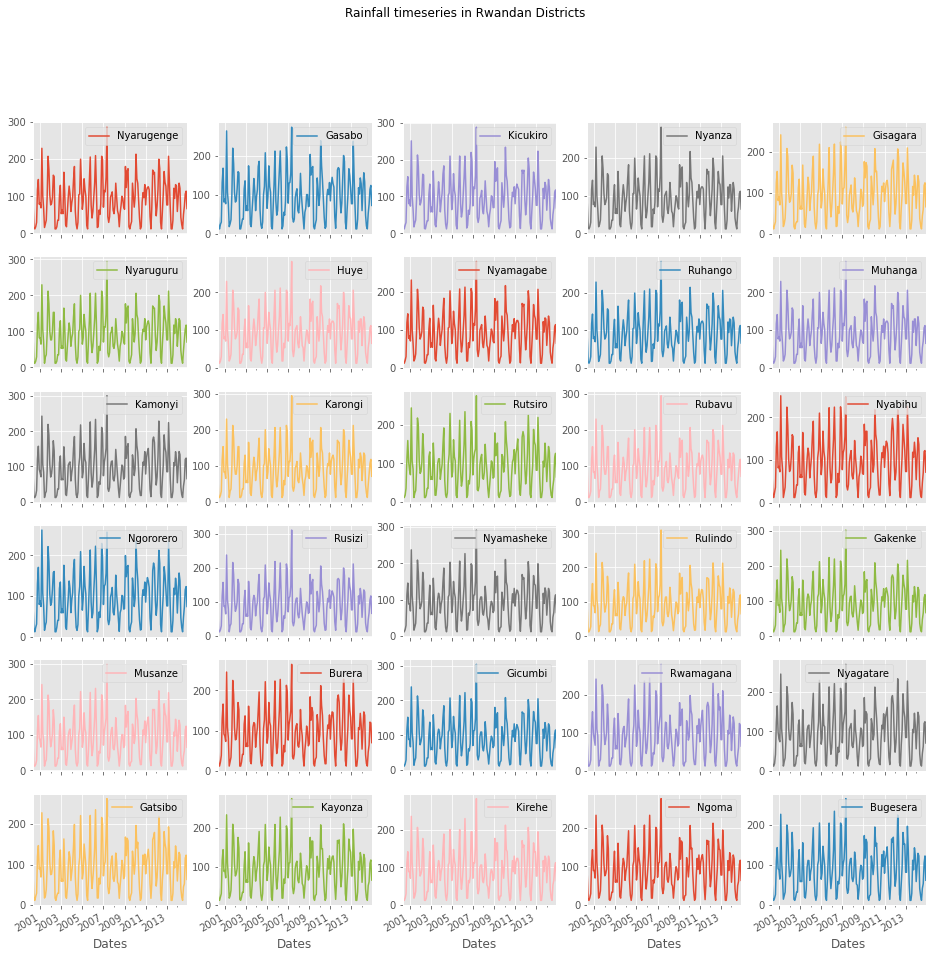

In [0]:
# plot rainfall subplots
rainfall_df.plot(kind='line', x='Dates', y=district_cols.tolist(), title='Rainfall timeseries in Rwandan Districts', subplots=True, layout=(6,5), figsize=(16,16));

**Plot vegetation time series graph**

In [0]:
# separate district data and date column
district_data = vegetation_df.iloc[:,1:]

# get district names
district_cols = district_data.columns

for i in range(len(district_cols)):
  #get district name
  district_name = district_cols[i]
  vegetation_df[district_name] = pd.to_numeric(vegetation_df.iloc[:,i+1])

# vegetation_df.info()

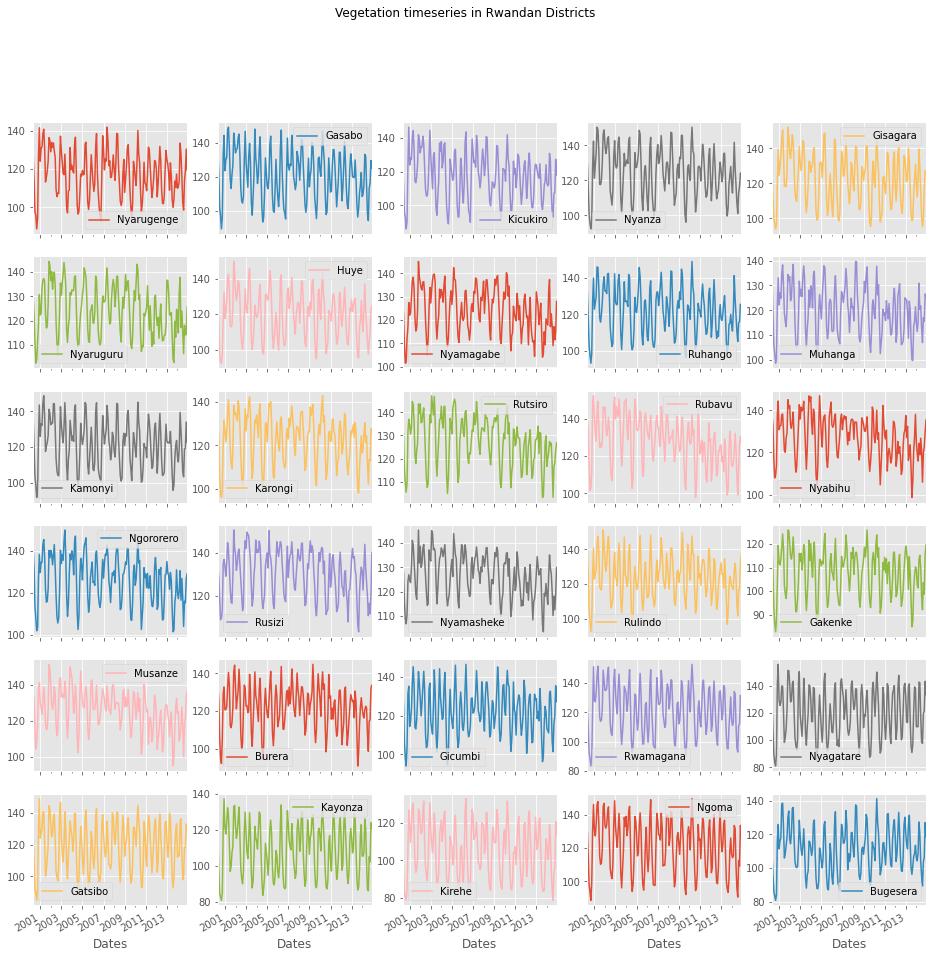

In [0]:
# plot vegetation subplots
vegetation_df.plot(kind='line', x='Dates', y=district_cols.tolist(), title='Vegetation timeseries in Rwandan Districts', subplots=True, layout=(6,5), figsize=(16,16));

## Question 3

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # return data
  return rainfall_data, vegetation_data

In [0]:
# load data
rainfall, vegetation = load_data()

**Calculate statistics for rainfall**

In [0]:
# change objects to numbers
rainfall_df = rainfall.apply(pd.to_numeric)
rainfall_df['Dates'] = pd.to_datetime(rainfall['Dates'])

In [0]:
# convert date values to datetime
dates_to_datetime = pd.to_datetime(rainfall_df['Dates'].values)

# Groupby months and calculate the mean
district_monthly_mean = rainfall_df.groupby([dates_to_datetime.month]).mean()

# transpose and get monthly mean for the districts combined
monthly_mean = district_monthly_mean.mean(axis=1)

# monthly_mean

In [0]:
# Groupby months and calculate the median
district_monthly_median = rainfall_df.groupby([dates_to_datetime.month]).median()

# transpose and get monthly statistics for the districts combined
monthly_median = district_monthly_median.median(axis=1)
# monthly_median

In [0]:
# Groupby months and calculate the min
district_monthly_min = rainfall_df.groupby([dates_to_datetime.month]).min()

# transpose and get monthly min for the districts combined
monthly_min = district_monthly_min.min(axis=1)
# monthly_min

In [0]:
# Groupby months and calculate the statistics
district_monthly_max = rainfall_df.groupby([dates_to_datetime.month]).max()

# transpose and get monthly statistics for the districts combined
monthly_max = district_monthly_max.max(axis=1)
# monthly_max

**Plot rainfall statistics against time**

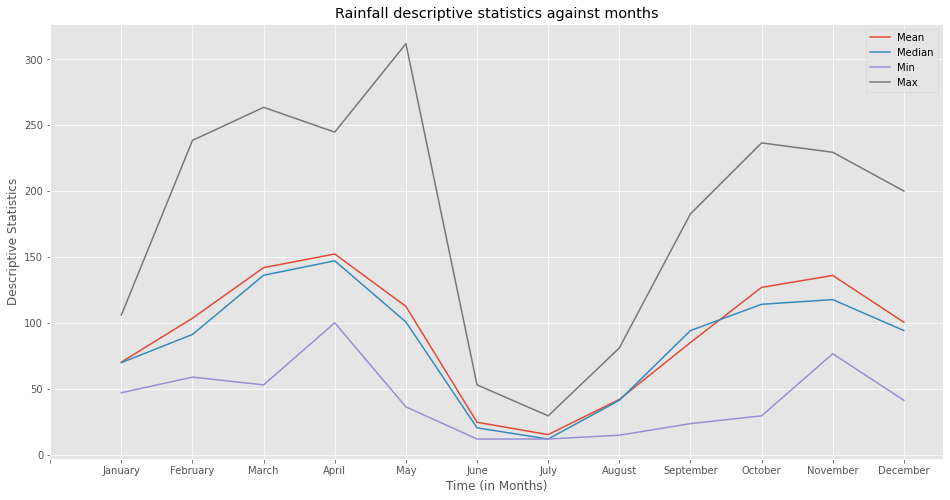

In [0]:
# Labels for xticks
month_arr = np.arange(13)
month_values = np.linspace(1,13,num=13)

# plot lines for the statistics
plt.figure(figsize = (16,8))
plt.plot(monthly_mean)
plt.plot(monthly_median)
plt.plot(monthly_min)
plt.plot(monthly_max)

plt.xticks(month_arr, [calendar.month_name[x-1] for x in month_values.astype(int)]);
plt.xlabel('Time (in Months)')
plt.ylabel('Descriptive Statistics')
plt.title('Rainfall descriptive statistics against months')
plt.legend(['Mean', 'Median', 'Min', 'Max'])

**Calculate statistics for vegetation index**

In [0]:
# change objects to datetime
vegetation_df = vegetation.apply(pd.to_numeric)
vegetation_df['Dates'] = pd.to_datetime(vegetation['Dates'])

In [0]:
# convert date values to datetime
dates_to_datetime = pd.to_datetime(vegetation_df['Dates'].values)

# Groupby months and calculate the statistics
district_monthly_mean = vegetation_df.groupby([dates_to_datetime.month]).mean()
district_monthly_median = vegetation_df.groupby([dates_to_datetime.month]).median()
district_monthly_min = vegetation_df.groupby([dates_to_datetime.month]).min()
district_monthly_max = vegetation_df.groupby([dates_to_datetime.month]).max()

# transpose and get monthly statistics for the districts combined
monthly_mean = district_monthly_mean.mean(axis=1)
monthly_median = district_monthly_median.median(axis=1)
monthly_min = district_monthly_min.min(axis=1)
monthly_max = district_monthly_max.max(axis=1)

**Plot vegetation statistics against time**

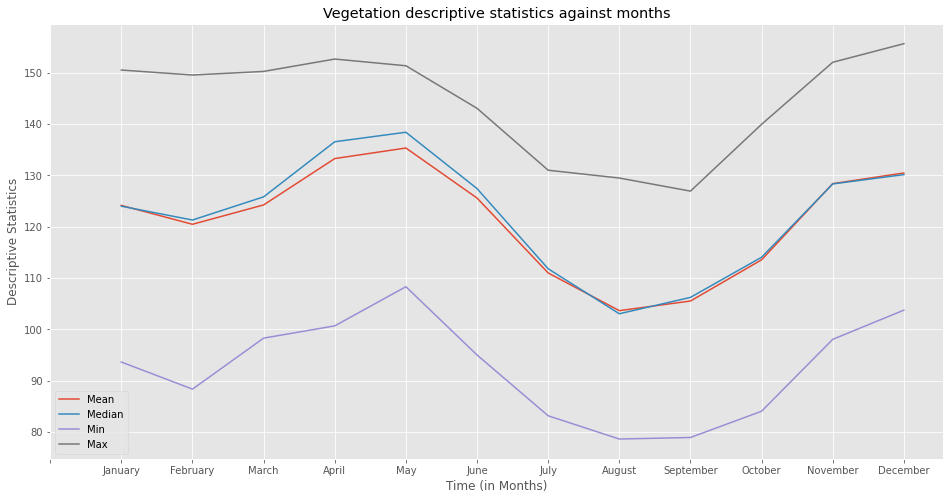

In [0]:
# Labels for xticks
month_arr = np.arange(13)
month_values = np.linspace(1,13,num=13)

# plot lines for the statistics
plt.figure(figsize = (16,8))
plt.plot(monthly_mean)
plt.plot(monthly_median)
plt.plot(monthly_min)
plt.plot(monthly_max)

plt.xticks(month_arr, [calendar.month_name[x-1] for x in month_values.astype(int)]);
plt.xlabel('Time (in Months)')
plt.ylabel('Descriptive Statistics')
plt.title('Vegetation descriptive statistics against months')
plt.legend(['Mean', 'Median', 'Min', 'Max'])

## Question 4

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # return data
  return rainfall_data, vegetation_data

In [0]:
# load data
rainfall, vegetation = load_data()
rainfall.head()

Year,Dates,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,2000-05-31,84.4,74.9,84.6,82.4,74.4,88.2,82.4,81.4,83.5,82.4,81.0,88.2,85.8,88.2,77.3,75.3,88.2,83.8,81.7,86.5,78.3,81.6,85.9,75.9,87.4,74.5,79.7,82.4,79.4,71.2
Unnamed: 6,2000-06-30,15.6,17.6,17.2,17.6,17.6,11.8,17.6,17.6,16.5,17.6,11.8,11.8,11.8,11.8,16.8,16.7,11.8,11.8,11.8,12.1,11.8,13.6,11.8,11.8,11.8,17.6,14.4,11.8,13.7,14.4
Unnamed: 7,2000-07-31,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
Unnamed: 8,2000-08-31,17.6,23.5,21.8,17.6,21.4,17.6,17.6,18.6,17.6,17.6,17.8,17.6,17.6,17.6,23.5,22.6,17.6,17.6,17.6,19.1,16.5,22.0,17.6,16.4,18.3,21.6,20.3,17.6,18.6,17.6
Unnamed: 9,2000-09-30,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,31.7,29.4,35.7,29.4,35.9,30.7,29.4,29.4,26.8,30.9,28.0,38.2,29.4,28.2,41.0,29.4,29.4,29.4,29.4,26.5


In [0]:
# sort rainfall
rainfall_sorted = rainfall.iloc[:,1:].sort_index(axis=1)
rainfall_sorted.head()

Year,Bugesera,Burera,Gakenke,Gasabo,Gatsibo,Gicumbi,Gisagara,Huye,Kamonyi,Karongi,Kayonza,Kicukiro,Kirehe,Muhanga,Musanze,Ngoma,Ngororero,Nyabihu,Nyagatare,Nyamagabe,Nyamasheke,Nyanza,Nyarugenge,Nyaruguru,Rubavu,Ruhango,Rulindo,Rusizi,Rutsiro,Rwamagana
Unnamed: 5,71.2,81.6,86.5,74.9,74.5,85.9,74.4,82.4,81.0,88.2,79.7,84.6,82.4,82.4,78.3,79.4,75.3,77.3,87.4,81.4,83.8,82.4,84.4,88.2,88.2,83.5,81.7,88.2,85.8,75.9
Unnamed: 6,14.4,13.6,12.1,17.6,17.6,11.8,17.6,17.6,11.8,11.8,14.4,17.2,11.8,17.6,11.8,13.7,16.7,16.8,11.8,17.6,11.8,17.6,15.6,11.8,11.8,16.5,11.8,11.8,11.8,11.8
Unnamed: 7,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
Unnamed: 8,17.6,22.0,19.1,23.5,21.6,17.6,21.4,17.6,17.8,17.6,20.3,21.8,17.6,17.6,16.5,18.6,22.6,23.5,18.3,18.6,17.6,17.6,17.6,17.6,17.6,17.6,17.6,17.6,17.6,16.4
Unnamed: 9,26.5,38.2,30.9,29.4,29.4,29.4,29.4,29.4,31.7,29.4,29.4,29.4,29.4,29.4,28.0,29.4,30.7,35.9,41.0,29.4,29.4,29.4,29.4,29.4,29.4,29.4,26.8,29.4,35.7,28.2


**Load location data**

In [0]:
# load location data
location_data = pd.read_csv('RwandaDistrictCentroidsLongitude-Latitude.csv')
location_data.head()

,wkt_geom,Prov_ID,Province,Dist_ID,District,Longitude,Latitude
0,POINT(30.44539187624978283 -1.61907593351633294),5,Eastern Province,53,Gatsibo,30.445392,1.619076
1,POINT(29.72272538213003301 -1.9548907110369993),2,Southern Province,27,Muhanga,29.722725,1.954891
2,POINT(30.11387116565671107 -1.62157664604772656),4,Northern Province,45,Gicumbi,30.113871,1.621577
3,POINT(30.14372498206437356 -2.00886367940993305),1,Kigali City,13,Kicukiro,30.143725,2.008864
4,POINT(29.98722685498238505 -1.73928358683540596),4,Northern Province,41,Rulindo,29.987227,1.739284


In [0]:
# sort by district col
location_data.sort_values(by=['District'], axis=0,inplace=True)
location_data.head()

,wkt_geom,Prov_ID,Province,Dist_ID,District,Longitude,Latitude
18,POINT(30.15016619384319085 -2.23976571691581228),5,Eastern Province,57,Bugesera,30.150166,2.239766
12,POINT(29.8265446555571323 -1.46624298042764845),4,Northern Province,44,Burera,29.826545,1.466243
14,POINT(29.78423663956539613 -1.69853058352873276),4,Northern Province,42,Gakenke,29.784237,1.698531
8,POINT(30.14221204833539147 -1.89144733707354451),1,Kigali City,12,Gasabo,30.142212,1.891447
0,POINT(30.44539187624978283 -1.61907593351633294),5,Eastern Province,53,Gatsibo,30.445392,1.619076


In [0]:
# Convert the Lat/Long degress in Radians
location_data['Latitude'] = np.radians(location_data['Latitude'])
location_data['Longitude'] = np.radians(location_data['Longitude'])
location_data.head()

,wkt_geom,Prov_ID,Province,Dist_ID,District,Longitude,Latitude
18,POINT(30.15016619384319085 -2.23976571691581228),5,Eastern Province,57,Bugesera,0.526220,0.039091
12,POINT(29.8265446555571323 -1.46624298042764845),4,Northern Province,44,Burera,0.520571,0.025591
14,POINT(29.78423663956539613 -1.69853058352873276),4,Northern Province,42,Gakenke,0.519833,0.029645
8,POINT(30.14221204833539147 -1.89144733707354451),1,Kigali City,12,Gasabo,0.526081,0.033012
0,POINT(30.44539187624978283 -1.61907593351633294),5,Eastern Province,53,Gatsibo,0.531372,0.028258


**Calculate distance in km**

In [0]:
# Use haversine dist metric as its suitable for 2d vector spaces
dist = DistanceMetric.get_metric('haversine')

# Calculate pairwise distance between points - multiply by 6373 to get dist in km
pairwise_dist =  dist.pairwise(location_data[['Latitude', 'Longitude']].to_numpy())*6373 
# pairwise_dist

In [0]:
# Create dataframe for the distance matrix
 dist_matrix = pd.DataFrame(pairwise_dist,  columns=location_data.District.unique(), index=location_data.District.unique()) 
 dist_matrix.head()

,Bugesera,Burera,Gakenke,Gasabo,Gatsibo,Gicumbi,Gisagara,Huye,Kamonyi,Karongi,Kayonza,Kicukiro,Kirehe,Muhanga,Musanze,Ngoma,Ngororero,Nyabihu,Nyagatare,Nyamagabe,Nyamasheke,Nyanza,Nyarugenge,Nyaruguru,Rubavu,Ruhango,Rulindo,Rusizi,Rutsiro,Rwamagana
Bugesera,0.000000,93.257922,72.656227,38.753483,76.442848,68.879342,54.144763,58.395918,37.612957,80.430568,70.111164,25.693173,62.263943,57.109163,102.220825,34.703922,76.073743,96.941460,103.477780,77.977738,110.361536,41.060015,30.679944,86.688463,110.918597,42.370844,58.541078,123.532148,91.477478,37.163131
Burera,93.257922,0.000000,26.262052,58.894979,70.878108,36.320431,128.136218,118.451244,61.006213,88.480858,99.978670,69.902205,130.207134,55.564326,24.718862,106.166717,53.972205,40.505949,63.159432,112.353201,124.788167,96.797334,62.657213,140.925381,57.708835,81.132471,35.235408,147.297894,68.022336,81.590828
Gakenke,72.656227,26.262052,0.000000,45.214266,74.038718,37.636078,102.497498,92.270355,36.994141,64.314884,96.744869,52.808167,118.959353,29.323420,29.748359,92.196399,31.111663,30.960001,77.414467,86.646032,101.764109,70.897556,42.487484,114.734805,49.341352,55.083698,23.019136,123.673909,48.526450,70.509922
Gasabo,38.753483,58.894979,45.214266,0.000000,45.320906,30.182588,87.375213,85.329175,29.714282,84.351382,55.797792,13.061283,73.778960,47.164063,73.866221,47.723060,63.690069,75.293852,66.968370,94.492811,121.010649,62.819071,16.848479,113.206553,92.729485,53.152795,24.152528,139.150380,82.628664,25.407973
Gatsibo,76.442848,70.878108,74.038718,45.320906,0.000000,36.861298,129.701717,129.806161,74.360216,127.612379,33.315040,54.813388,74.510617,88.601323,94.223240,62.738103,101.548246,103.991618,32.073348,139.731495,165.108462,107.742619,62.169159,158.015744,122.664359,98.446164,52.665270,184.018467,120.561907,40.905674


**Calculate rainfall correlations**

In [0]:
# change objects to numbers
rainfall_df = rainfall_sorted.apply(pd.to_numeric)

# corrcoef of rainfall between districts
rain_corr_coef = rainfall_df.corr()
rain_corr_coef.head()

Year,Bugesera,Burera,Gakenke,Gasabo,Gatsibo,Gicumbi,Gisagara,Huye,Kamonyi,Karongi,Kayonza,Kicukiro,Kirehe,Muhanga,Musanze,Ngoma,Ngororero,Nyabihu,Nyagatare,Nyamagabe,Nyamasheke,Nyanza,Nyarugenge,Nyaruguru,Rubavu,Ruhango,Rulindo,Rusizi,Rutsiro,Rwamagana
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bugesera,1.000000,0.987841,0.989320,0.978437,0.995778,0.991756,0.990835,0.988127,0.992600,0.986278,0.995599,0.985113,0.993356,0.988127,0.994534,0.996812,0.980999,0.984217,0.988200,0.989541,0.993222,0.988127,0.988229,0.986278,0.986278,0.988281,0.993466,0.988718,0.990646,0.993300
Burera,0.987841,1.000000,0.995221,0.989830,0.988327,0.991745,0.989373,0.988155,0.996636,0.990765,0.990994,0.989393,0.987886,0.988155,0.993549,0.989895,0.992779,0.996662,0.997575,0.989443,0.990056,0.988155,0.989801,0.990765,0.990765,0.989211,0.993121,0.992424,0.994827,0.990278
Gakenke,0.989320,0.995221,1.000000,0.991526,0.989577,0.998789,0.991150,0.994603,0.996580,0.996360,0.995284,0.994431,0.994125,0.994603,0.994648,0.994304,0.992190,0.993625,0.991531,0.995157,0.996633,0.994603,0.995957,0.996360,0.996360,0.995486,0.998720,0.999502,0.991487,0.988665
Gasabo,0.978437,0.989830,0.991526,1.000000,0.980092,0.989054,0.990264,0.990518,0.987498,0.991135,0.987638,0.996556,0.985636,0.990518,0.985264,0.985147,0.998432,0.993338,0.985239,0.991359,0.987612,0.990518,0.991474,0.991135,0.991135,0.991178,0.988675,0.990271,0.983058,0.977298
Gatsibo,0.995778,0.988327,0.989577,0.980092,1.000000,0.990609,0.995766,0.988845,0.990090,0.987860,0.996676,0.987021,0.990846,0.988845,0.990758,0.995928,0.983144,0.987348,0.985822,0.990931,0.991290,0.988845,0.989244,0.987860,0.987860,0.989173,0.991171,0.988884,0.987608,0.989505


**Remove duplicate values**

In [0]:
dist_length = len(dist_matrix)

dist_list = []
rain_corr_list = []

for i in range(dist_length):
  l = dist_matrix.iloc[i,i+1:]
  r = rain_corr_coef.iloc[i,i+1:]
  dist_list.append(l)
  rain_corr_list.append(r)

pd.DataFrame(dist_list).head()

,Burera,Gakenke,Gasabo,Gatsibo,Gicumbi,Gisagara,Huye,Kamonyi,Karongi,Kayonza,Kicukiro,Kirehe,Muhanga,Musanze,Ngoma,Ngororero,Nyabihu,Nyagatare,Nyamagabe,Nyamasheke,Nyanza,Nyarugenge,Nyaruguru,Rubavu,Ruhango,Rulindo,Rusizi,Rutsiro,Rwamagana
Bugesera,93.257922,72.656227,38.753483,76.442848,68.879342,54.144763,58.395918,37.612957,80.430568,70.111164,25.693173,62.263943,57.109163,102.220825,34.703922,76.073743,96.941460,103.477780,77.977738,110.361536,41.060015,30.679944,86.688463,110.918597,42.370844,58.541078,123.532148,91.477478,37.163131
Burera,NaN,26.262052,58.894979,70.878108,36.320431,128.136218,118.451244,61.006213,88.480858,99.978670,69.902205,130.207134,55.564326,24.718862,106.166717,53.972205,40.505949,63.159432,112.353201,124.788167,96.797334,62.657213,140.925381,57.708835,81.132471,35.235408,147.297894,68.022336,81.590828
Gakenke,NaN,NaN,45.214266,74.038718,37.636078,102.497498,92.270355,36.994141,64.314884,96.744869,52.808167,118.959353,29.323420,29.748359,92.196399,31.111663,30.960001,77.414467,86.646032,101.764109,70.897556,42.487484,114.734805,49.341352,55.083698,23.019136,123.673909,48.526450,70.509922
Gasabo,NaN,NaN,NaN,45.320906,30.182588,87.375213,85.329175,29.714282,84.351382,55.797792,13.061283,73.778960,47.164063,73.866221,47.723060,63.690069,75.293852,66.968370,94.492811,121.010649,62.819071,16.848479,113.206553,92.729485,53.152795,24.152528,139.150380,82.628664,25.407973
Gatsibo,NaN,NaN,NaN,NaN,36.861298,129.701717,129.806161,74.360216,127.612379,33.315040,54.813388,74.510617,88.601323,94.223240,62.738103,101.548246,103.991618,32.073348,139.731495,165.108462,107.742619,62.169159,158.015744,122.664359,98.446164,52.665270,184.018467,120.561907,40.905674


**Graph showing correlations vs distance**

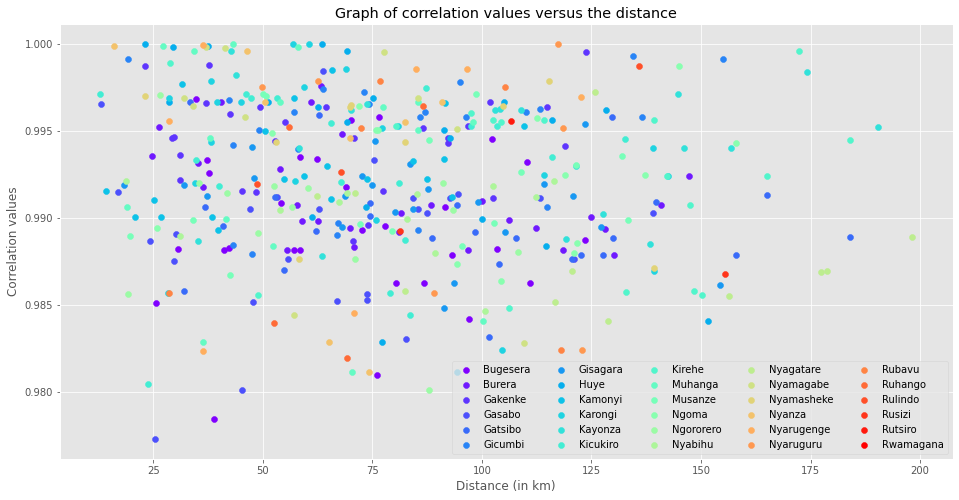

In [0]:
# get district names
dist_names = rainfall_sorted.columns

colors = cm.rainbow(np.linspace(0, 1, len(dist_names)))

# graph to show the correlation values versus the distance, d, measured in km between the pair of districts
plt.figure(figsize = (16,8))
for i in range(dist_length):
  plt.scatter(dist_list[i], rain_corr_list[i], color=colors[i])

plt.xlabel('Distance (in km)')
plt.ylabel('Correlation values')
plt.title('Graph of correlation values versus the distance')

# do we need this legend?
plt.legend(dist_names,ncol=5);

**Exponential decay function**

In [0]:
def exponential_decay(dist, initial_corr, decay_const):
  return initial_corr * np.exp(-decay_const*dist)

In [0]:
# flatten 2D lists
rain_corr_flat = [x for sublist in rain_corr_list for x in sublist]
dist_flat = [x for sublist in dist_list for x in sublist]

In [0]:
# fit function to data to get initial_corr and the decay constant
popt, pcov = curve_fit(exponential_decay, dist_flat, rain_corr_flat)

# get c0 and a
c0 = popt[0]
a = popt[1]
print("C0 = %f\nDecay constant = %f" %(c0, a))

C0 = 0.993126
Decay constant = 0.000013


**Fit the model**

In [0]:
# sort distance values and convert to pandas dataframe
dist_flat_df = pd.DataFrame(sorted(dist_flat))

# run model to get correlation decay
decaying_corr = exponential_decay(dist_flat_df, c0, a)
decaying_corr.head()

,0
0,0.992955
1,0.992953
2,0.992938
3,0.992915
4,0.992903


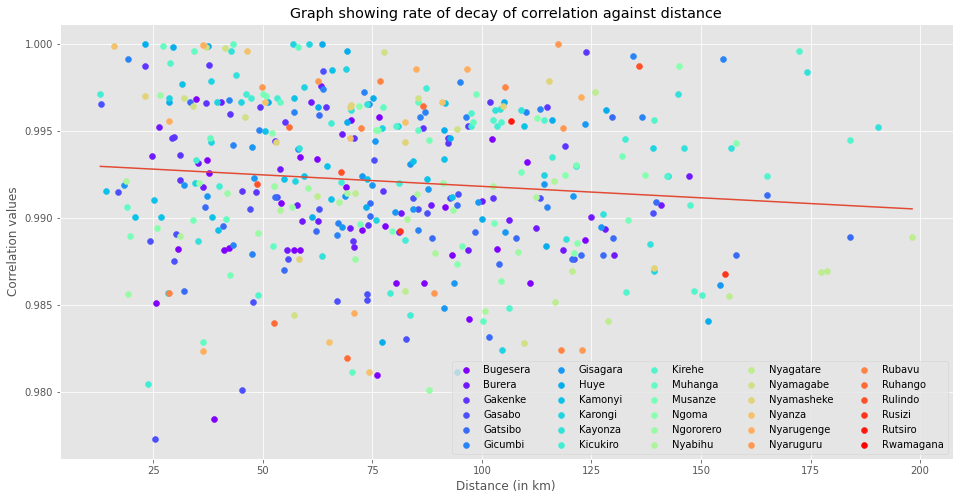

In [0]:
# graph to show the correlation values versus the distance, d, measured in km between the pair of districts
plt.figure(figsize = (16,8))
for i in range(dist_length):
  plt.scatter(dist_list[i], rain_corr_list[i], color=colors[i])

plt.xlabel('Distance (in km)')
plt.ylabel('Correlation values')
plt.title('Graph showing rate of decay of correlation against distance')

# do we need this legend?
plt.legend(dist_names,ncol=5);
plt.plot(dist_flat_df, decaying_corr)

## Question 5

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # change objects to numbers
  rainfall_df = rainfall_data.apply(pd.to_numeric)
  rainfall_df['Dates'] = pd.to_datetime(rainfall_data['Dates'])

  vegetation_df = vegetation_data.apply(pd.to_numeric)
  vegetation_df['Dates'] = pd.to_datetime(vegetation_df['Dates'])

  # return data
  return rainfall_df, vegetation_df

In [0]:
rainfall, vegetation = load_data()

**Dates already in sync thus just draw scatter plot**

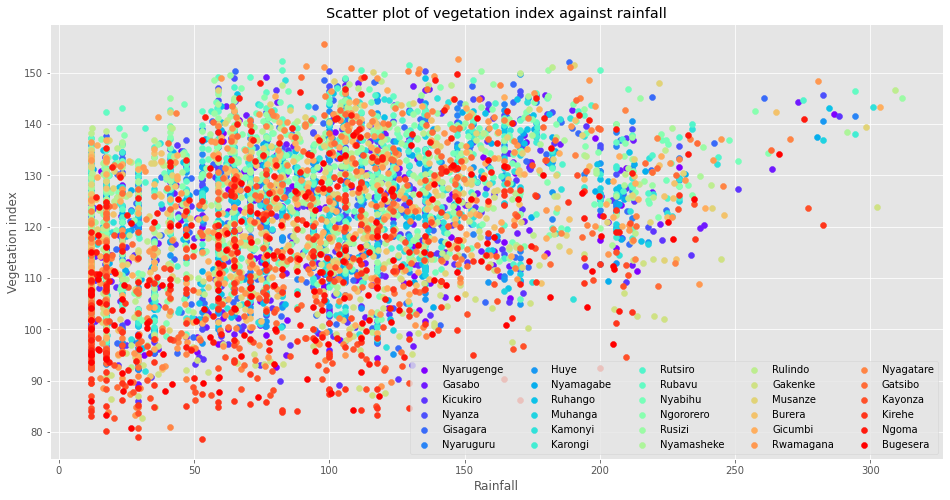

In [0]:
rainfall_df = rainfall.iloc[:, 1:]
vegetation_df = vegetation.iloc[:, 1:]

# get district names
dist_names = rainfall_df.columns
dist_length = len(dist_names)

colors = cm.rainbow(np.linspace(0, 1, len(dist_names)))

# graph to show the vegetation index against rainfall
plt.figure(figsize = (16,8))
for i in range(dist_length):
  district = dist_names[i]
  plt.scatter(rainfall_df[district], vegetation_df[district], color=colors[i])

plt.xlabel('Rainfall')
plt.ylabel('Vegetation index')
plt.title('Scatter plot of vegetation index against rainfall')
plt.legend(dist_names,ncol=5);

## Question 6

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # change objects to numbers
  rainfall_df = rainfall_data.apply(pd.to_numeric)
  rainfall_df['Dates'] = pd.to_datetime(rainfall_data['Dates'])

  vegetation_df = vegetation_data.apply(pd.to_numeric)
  vegetation_df['Dates'] = pd.to_datetime(vegetation_df['Dates'])

  # return data
  return rainfall_df, vegetation_df

In [0]:
rainfall, vegetation = load_data()

In [0]:
rainfall_df = rainfall.iloc[:, 1:]
vegetation_df = vegetation.iloc[:, 1:]

# get district names
dist_names = rainfall_df.columns

# create dataframe to store optimal month and correlation
corr_df = pd.DataFrame(list(dist_names), columns=['District'])
corr_df.head()

,District
0,Nyarugenge
1,Gasabo
2,Kicukiro
3,Nyanza
4,Gisagara


**Create correlations in delayed timeseries**

In [0]:
# create new feature, delayed timeseries
dist_length = len(dist_names)

optimal_delay_list = []
max_corr_list = []

for i in range(dist_length):
  # get district name
  district = dist_names[i]

  # get district vegetation and rain data
  district_veg_data = vegetation_df[district]
  district_rain_data = rainfall_df[district]

  rain_data_size = len(district_rain_data)
  veg_data_size = len(district_veg_data)

  # variable to store max corr for district and month
  max_corr = 0
  max_month = -1

  # delay the timeseries
  for k in range(13):
    delayed_rain = district_rain_data.iloc[0:rain_data_size-k]
    delayed_vegetation = district_veg_data.iloc[k:veg_data_size]

    # calculate correlation
    corr = delayed_rain.corr(delayed_vegetation)

    # check if correlation is max and update
    if(max_corr < corr):
      max_corr = corr
      max_month = k
    
  # save value in list
  optimal_delay_list.append(max_month)
  max_corr_list.append(max_corr)
  #print('%s %f %d' %(district, max_corr, max_month))

# save values to dataframe
corr_df['Optimal Delay Months'] = optimal_delay_list
corr_df['Correlation'] = max_corr_list
corr_df.head()

,District,Optimal Delay Months,Correlation
0,Nyarugenge,1,0.347187
1,Gasabo,2,0.370063
2,Kicukiro,1,0.369447
3,Nyanza,1,0.423050
4,Gisagara,1,0.423165


## Question 7

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # change objects to numbers
  rainfall_df = rainfall_data.apply(pd.to_numeric)
  rainfall_df['Dates'] = pd.to_datetime(rainfall_data['Dates'])

  vegetation_df = vegetation_data.apply(pd.to_numeric)
  vegetation_df['Dates'] = pd.to_datetime(vegetation_df['Dates'])

  # return data
  return rainfall_df, vegetation_df

In [0]:
rainfall, vegetation = load_data()

In [19]:
rainfall_df = rainfall.iloc[:, 1:]
vegetation_df = vegetation.iloc[:, 1:]

# get district names
dist_names = rainfall_df.columns

# create dataframe that will store correlations for SMA with diff sliding windows
corr_df = pd.DataFrame(columns=list(dist_names), index=np.linspace(1, 12, 12).astype(int))
corr_df.head()

,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Calculate correlation with rain at different moving averages**

In [0]:
# create new feature, delayed timeseries
dist_length = len(dist_names)

for i in range(dist_length):
  # get district name
  district = dist_names[i]

  # get district vegetation and rain data
  district_veg_data = vegetation_df[district]
  district_rain_data = rainfall_df[district]

  rain_data_size = len(district_rain_data)
  veg_data_size = len(district_veg_data)

  # list to store corr values for the different sliding windows
  corr_list = []

  # variable to store max corr for district and window size
  max_corr = 0
  max_window = -1

  # calculate SMA with diff window sizes
  for k in range(1, 13):
    rainfall_ma = district_rain_data.rolling(window=k).mean()
    #delayed_vegetation = district_veg_data.iloc[k:veg_data_size]

    # print(len(delayed_vegetation))

    # calculate correlation
    corr = rainfall_ma.corr(district_veg_data)
    corr_list.append(corr)

    # check if correlation is max and update
    if(max_corr < corr):
      max_corr = corr
      max_window = k
    
  # print optimal value
  # print('%s %f %d' %(district, max_corr, max_window))

  # save values to dataframe
  corr_df[district] = corr_list

In [174]:
# see values in dataframe
corr_df.head()

,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
1,0.345469,0.364914,0.368110,0.422077,0.421503,0.328468,0.404645,0.279626,0.418898,0.298986,0.386096,0.349002,0.343961,0.268006,0.371649,0.329331,0.337469,0.260381,0.355392,0.270397,0.266694,0.332027,0.363082,0.380000,0.474722,0.468495,0.406614,0.384355,0.398624,0.406135
2,0.619014,0.654593,0.638506,0.688330,0.692520,0.533268,0.677262,0.490020,0.673962,0.562068,0.663037,0.586868,0.562071,0.498291,0.558571,0.587213,0.551506,0.464114,0.647860,0.572297,0.481737,0.619727,0.643982,0.671927,0.727069,0.730577,0.683645,0.651622,0.680430,0.682901
3,0.742122,0.785509,0.765414,0.802222,0.808375,0.652537,0.803033,0.629151,0.783885,0.715056,0.779989,0.747000,0.705748,0.628159,0.637537,0.743086,0.684091,0.607909,0.777021,0.765620,0.587542,0.757038,0.757519,0.797250,0.795907,0.795985,0.793471,0.789648,0.805887,0.783666
4,0.721606,0.748989,0.739167,0.763928,0.764920,0.672596,0.778022,0.670827,0.741903,0.719056,0.745958,0.776099,0.732608,0.576519,0.574987,0.763925,0.710467,0.662300,0.732891,0.795839,0.518741,0.700386,0.682174,0.752960,0.679147,0.683428,0.735675,0.768026,0.760979,0.738887
5,0.590444,0.590582,0.594453,0.624663,0.620446,0.603804,0.646616,0.610788,0.604784,0.603445,0.606330,0.676124,0.627567,0.348155,0.371707,0.649106,0.619428,0.605213,0.566222,0.670793,0.283041,0.487307,0.485620,0.593538,0.442348,0.459428,0.557722,0.626608,0.588702,0.604531


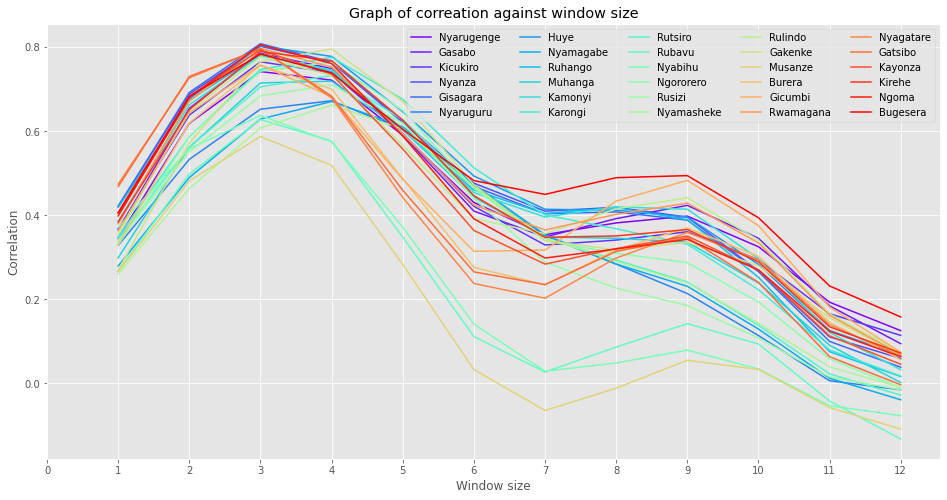

In [22]:
colors = cm.rainbow(np.linspace(0, 1, len(dist_names)))
x_arr = np.arange(13)

plt.figure(figsize = (16,8))

# use for loop to have different colors for the districts
for i in range(dist_length):
  district = dist_names[i]
  plt.plot(corr_df[district], color=colors[i])

#plt.plot(corr_df)
plt.xlabel('Window size')
plt.ylabel('Correlation')
plt.title('Graph of correation against window size')
plt.xticks(x_arr, x_arr);
plt.legend(dist_names,ncol=5);

## Question 8

**Load rainfall and vegetation data**

In [0]:
def load_data():
  # load measurement of rainfall data
  rainfall_data = pd.read_csv('RwandaDistrictRainfall.csv')
  vegetation_data = pd.read_csv('RwandaDistrictVegetation.csv')

  # Transpose data
  rainfall_data = rainfall_data.T
  vegetation_data = vegetation_data.T

  # make first row the header in rainfall data
  header = rainfall_data.iloc[0] 
  rainfall_data = rainfall_data[1:] 
  rainfall_data.columns = header 

   # make first row the header in vegetation data
  header = vegetation_data.iloc[0] 
  vegetation_data = vegetation_data[1:] 
  vegetation_data.columns = header

  # create dates from 2000 to 2014
  dates = pd.date_range(start='2000-01-01', end='2015-01-01', freq='M')
  dates = pd.to_datetime(dates)

  # add date column to data and set as new index
  rainfall_data.insert(1, 'Dates', dates)
  vegetation_data.insert(1, 'Dates', dates)

  # Drop Nans in vegetation data
  vegetation_data = vegetation_data.dropna()

  # drop colums that are missing in vegetation data
  rainfall_data = rainfall_data.iloc[4:]

  # reorder data
  rainfall_data = rainfall_data.iloc[:,1:]
  vegetation_data = vegetation_data.iloc[:,1:]

  # change objects to numbers
  rainfall_df = rainfall_data.apply(pd.to_numeric)
  rainfall_df['Dates'] = pd.to_datetime(rainfall_data['Dates'])

  vegetation_df = vegetation_data.apply(pd.to_numeric)
  vegetation_df['Dates'] = pd.to_datetime(vegetation_df['Dates'])

  # return data
  return rainfall_df, vegetation_df

In [153]:
rainfall, vegetation = load_data()
rainfall.head()

Year,Dates,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,2000-05-31,84.4,74.9,84.6,82.4,74.4,88.2,82.4,81.4,83.5,82.4,81.0,88.2,85.8,88.2,77.3,75.3,88.2,83.8,81.7,86.5,78.3,81.6,85.9,75.9,87.4,74.5,79.7,82.4,79.4,71.2
Unnamed: 6,2000-06-30,15.6,17.6,17.2,17.6,17.6,11.8,17.6,17.6,16.5,17.6,11.8,11.8,11.8,11.8,16.8,16.7,11.8,11.8,11.8,12.1,11.8,13.6,11.8,11.8,11.8,17.6,14.4,11.8,13.7,14.4
Unnamed: 7,2000-07-31,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
Unnamed: 8,2000-08-31,17.6,23.5,21.8,17.6,21.4,17.6,17.6,18.6,17.6,17.6,17.8,17.6,17.6,17.6,23.5,22.6,17.6,17.6,17.6,19.1,16.5,22.0,17.6,16.4,18.3,21.6,20.3,17.6,18.6,17.6
Unnamed: 9,2000-09-30,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,31.7,29.4,35.7,29.4,35.9,30.7,29.4,29.4,26.8,30.9,28.0,38.2,29.4,28.2,41.0,29.4,29.4,29.4,29.4,26.5


In [138]:
# remove date column
rainfall_df = rainfall.iloc[:, 1:]
vegetation_df = vegetation.iloc[:, 1:]

# get district names
dist_names = rainfall_df.columns

rainfall_df.head()

Year,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,84.4,74.9,84.6,82.4,74.4,88.2,82.4,81.4,83.5,82.4,81.0,88.2,85.8,88.2,77.3,75.3,88.2,83.8,81.7,86.5,78.3,81.6,85.9,75.9,87.4,74.5,79.7,82.4,79.4,71.2
Unnamed: 6,15.6,17.6,17.2,17.6,17.6,11.8,17.6,17.6,16.5,17.6,11.8,11.8,11.8,11.8,16.8,16.7,11.8,11.8,11.8,12.1,11.8,13.6,11.8,11.8,11.8,17.6,14.4,11.8,13.7,14.4
Unnamed: 7,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
Unnamed: 8,17.6,23.5,21.8,17.6,21.4,17.6,17.6,18.6,17.6,17.6,17.8,17.6,17.6,17.6,23.5,22.6,17.6,17.6,17.6,19.1,16.5,22.0,17.6,16.4,18.3,21.6,20.3,17.6,18.6,17.6
Unnamed: 9,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,31.7,29.4,35.7,29.4,35.9,30.7,29.4,29.4,26.8,30.9,28.0,38.2,29.4,28.2,41.0,29.4,29.4,29.4,29.4,26.5


In [139]:
# View vegetation data
vegetation_df.head()

Unnamed: 0,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,127.133558,134.274365,127.197642,130.407565,124.877628,129.622365,126.361863,128.071805,132.441846,131.445190,135.712933,131.689525,137.938909,139.308084,137.272474,140.512884,133.340020,132.472857,139.283696,118.175712,135.714897,134.276864,137.636419,122.238515,125.553883,125.890110,113.814089,110.627623,129.789072,108.315401
Unnamed: 6,114.194658,121.746863,112.709287,115.476082,113.087827,122.600696,113.875243,122.726689,117.984585,119.228925,120.551808,123.671300,130.075794,134.088291,132.627250,131.481542,128.428708,127.705766,126.332629,107.871243,131.593790,125.365627,125.461895,109.231011,107.895170,110.811168,98.268054,95.024470,115.142145,96.147592
Unnamed: 7,97.707394,101.761018,95.870810,100.632357,100.303528,111.281785,97.991159,109.524207,102.560488,106.294952,103.444293,105.240270,115.103683,116.508394,116.666619,113.451667,118.112470,115.963478,105.528868,93.159510,116.513982,104.960831,105.881359,92.472676,89.554987,92.524644,84.752643,83.192432,98.026140,86.140547
Unnamed: 8,95.699328,96.821079,93.065278,95.565559,97.353433,102.560603,93.189050,101.471406,97.984329,102.542930,98.891787,97.295956,109.923862,101.491650,107.933026,107.780284,108.825997,108.856395,99.013070,86.494270,104.174068,94.979543,98.562634,88.590049,83.901664,88.723776,82.719604,80.193407,93.709170,83.356638
Unnamed: 9,88.729965,89.282895,86.075767,92.335410,94.047278,104.060466,92.265781,101.832852,93.234306,98.709076,91.938377,96.156643,105.495811,102.773708,109.167138,101.769633,109.857639,106.695833,92.590560,82.750092,107.802326,92.243931,93.914034,83.392169,80.959234,84.875235,80.866587,78.962225,88.514729,80.818187


### Create new features by transforming rainfall time series

**Flatten vegetation index data**

In [157]:
vegetation_flat = pd.melt(vegetation, id_vars=['Dates'], value_vars=list(dist_names), var_name='District', value_name='Vegetation Index')
vegetation_flat.head()

,Dates,District,Vegetation Index
0,2000-05-31,Nyarugenge,127.133558
1,2000-06-30,Nyarugenge,114.194658
2,2000-07-31,Nyarugenge,97.707394
3,2000-08-31,Nyarugenge,95.699328
4,2000-09-30,Nyarugenge,88.729965


**Flatten rainfall data**

In [161]:
rainfall_flat = pd.melt(rainfall_df, value_vars=list(dist_names), var_name='District', value_name='Rainfall')
rainfall_flat.head()

,District,Rainfall
0,Nyarugenge,84.4
1,Nyarugenge,15.6
2,Nyarugenge,11.8
3,Nyarugenge,17.6
4,Nyarugenge,29.4


**Create new dataset with all predictor variables and the response variable**

In [162]:
dataset_df = vegetation_flat

# get rainfall data
rainfall_list = rainfall_flat.iloc[:,1]

# append to dataset
dataset_df['Rainfall'] = rainfall_list
dataset_df.head()

,Dates,District,Vegetation Index,Rainfall
0,2000-05-31,Nyarugenge,127.133558,84.4
1,2000-06-30,Nyarugenge,114.194658,15.6
2,2000-07-31,Nyarugenge,97.707394,11.8
3,2000-08-31,Nyarugenge,95.699328,17.6
4,2000-09-30,Nyarugenge,88.729965,29.4


**Create delayed rainfall dataframe**

In [163]:
# create dataframe to store optimal delay month
optimal_delayed_rainfall_df = pd.DataFrame(list(dist_names), columns=['District'])

# create new feature, delayed timeseries
dist_length = len(dist_names)

optimal_delay_list = []

for i in range(dist_length):
  # get district name
  district = dist_names[i]

  # get district vegetation and rain data
  district_veg_data = vegetation_df[district]
  district_rain_data = rainfall_df[district]

  rain_data_size = len(district_rain_data)
  veg_data_size = len(district_veg_data)

  # variable to store max corr for district and month
  max_corr = 0
  max_month = -1

  # delay the timeseries
  for k in range(13):
    delayed_rain = district_rain_data.iloc[0:rain_data_size-k]
    delayed_vegetation = district_veg_data.iloc[k:veg_data_size]

    # calculate correlation
    corr = delayed_rain.corr(delayed_vegetation)

    # check if correlation is max and update
    if(max_corr < corr):
      max_corr = corr
      max_month = k
    
  # save value in list
  optimal_delay_list.append(max_month)
  #print('%s %f %d' %(district, max_corr, max_month))

# save values to dataframe
optimal_delayed_rainfall_df['Optimal_Delay_Months'] = optimal_delay_list
optimal_delayed_rainfall_df.head()

,District,Optimal_Delay_Months
0,Nyarugenge,1
1,Gasabo,2
2,Kicukiro,1
3,Nyanza,1
4,Gisagara,1


**Create dataframe with delayed rainfall values**

In [164]:
delayed_rainfall_df = pd.DataFrame(columns=dist_names)

for i in range(dist_length):
  # get district name
  district = dist_names[i]

  # get district rain data
  rainfall_data = pd.DataFrame(rainfall_df[district])

  # get optimal district delay value
  row_values = optimal_delayed_rainfall_df.loc[optimal_delayed_rainfall_df['District'] == district]
  delay_month = row_values['Optimal_Delay_Months'].values[0]

  # calculate new delayed rainfall data
  delayed_rain = rainfall_data.shift(periods=delay_month)
  delayed_rainfall_df[district] = delayed_rain[district]

delayed_rainfall_df.head()

Year,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,84.4,NaN,84.6,82.4,74.4,NaN,82.4,NaN,83.5,82.4,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.9,87.4,74.5,79.7,82.4,79.4,71.2
Unnamed: 7,15.6,74.9,17.2,17.6,17.6,88.2,17.6,81.4,16.5,17.6,11.8,88.2,85.8,88.2,77.3,75.3,88.2,83.8,81.7,86.5,78.3,81.6,85.9,11.8,11.8,17.6,14.4,11.8,13.7,14.4
Unnamed: 8,11.8,17.6,11.8,11.8,11.8,11.8,11.8,17.6,11.8,11.8,11.8,11.8,11.8,11.8,16.8,16.7,11.8,11.8,11.8,12.1,11.8,13.6,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
Unnamed: 9,17.6,11.8,21.8,17.6,21.4,11.8,17.6,11.8,17.6,17.6,17.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,16.4,18.3,21.6,20.3,17.6,18.6,17.6


**Flatten delayed rainfall and add to dataframe**

In [165]:
# flatten data
delayed_rainfall_flat = pd.melt(delayed_rainfall_df, value_vars=list(dist_names), var_name='District', value_name='Delayed Rainfall')
delayed_rainfall_flat.head()

,District,Delayed Rainfall
0,Nyarugenge,NaN
1,Nyarugenge,84.4
2,Nyarugenge,15.6
3,Nyarugenge,11.8
4,Nyarugenge,17.6


In [166]:
# get delayed rainfall data
delayed_rainfall_list = delayed_rainfall_flat.iloc[:,1]

# append to dataset
dataset_df['Delayed Rainfall'] = delayed_rainfall_list
dataset_df.head()

,Dates,District,Vegetation Index,Rainfall,Delayed Rainfall
0,2000-05-31,Nyarugenge,127.133558,84.4,NaN
1,2000-06-30,Nyarugenge,114.194658,15.6,84.4
2,2000-07-31,Nyarugenge,97.707394,11.8,15.6
3,2000-08-31,Nyarugenge,95.699328,17.6,11.8
4,2000-09-30,Nyarugenge,88.729965,29.4,17.6


**Create SMA dataframe**

In [167]:
# create dataframe to store optimalwindow size
optimal_window_size_df = pd.DataFrame(list(dist_names), columns=['District'])

# create new feature, delayed timeseries
dist_length = len(dist_names)

# list to the different optimal sliding windows
optimal_window_list = []

for i in range(dist_length):
  # get district name
  district = dist_names[i]

  # get district vegetation and rain data
  district_veg_data = vegetation_df[district]
  district_rain_data = rainfall_df[district]

  rain_data_size = len(district_rain_data)
  veg_data_size = len(district_veg_data)

  # variable to store max corr for district and optimal window size
  max_corr = 0
  max_window = -1

  # calculate SMA with diff window sizes
  for k in range(1, 13):
    rainfall_ma = district_rain_data.rolling(window=k).mean()

    # calculate correlation
    corr = rainfall_ma.corr(district_veg_data)

    # check if correlation is max and update
    if(max_corr < corr):
      max_corr = corr
      max_window = k
    
  optimal_window_list.append(max_window)
  # print optimal value
  #print('%s %f %d' %(district, max_corr, max_window))

# save values to dataframe
optimal_window_size_df['Optimal_Window_Size'] = optimal_window_list
optimal_window_size_df.head()

,District,Optimal_Window_Size
0,Nyarugenge,3
1,Gasabo,3
2,Kicukiro,3
3,Nyanza,3
4,Gisagara,3


**Create dataframe with SMA rainfall values**

In [168]:
sma_rainfall_df = pd.DataFrame(columns=dist_names)

for i in range(dist_length):
  # get district name
  district = dist_names[i]

  # get district rain data
  rainfall_data = pd.DataFrame(rainfall_df[district])

  # get optimal district delay value
  row_values = optimal_window_size_df.loc[optimal_window_size_df['District'] == district]
  window_size = row_values['Optimal_Window_Size'].values[0]

  # calculate new delayed rainfall data
  sma_rainfall =  rainfall_data.rolling(window=window_size).mean()
  sma_rainfall_df[district] = sma_rainfall[district]

sma_rainfall_df.head()

Year,Nyarugenge,Gasabo,Kicukiro,Nyanza,Gisagara,Nyaruguru,Huye,Nyamagabe,Ruhango,Muhanga,Kamonyi,Karongi,Rutsiro,Rubavu,Nyabihu,Ngororero,Rusizi,Nyamasheke,Rulindo,Gakenke,Musanze,Burera,Gicumbi,Rwamagana,Nyagatare,Gatsibo,Kayonza,Kirehe,Ngoma,Bugesera
Unnamed: 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,37.266667,34.766667,37.866667,37.266667,34.600000,NaN,37.266667,NaN,37.266667,NaN,34.866667,NaN,NaN,37.266667,35.300000,NaN,NaN,NaN,35.100000,NaN,33.966667,35.666667,36.500000,33.166667,37.000000,34.633333,35.3,35.333333,34.966667,32.466667
Unnamed: 8,15.000000,17.633333,16.933333,15.666667,16.933333,32.35,15.666667,32.35,15.300000,32.35,13.800000,32.35,31.750,13.733333,17.366667,31.60,32.35,31.25,13.733333,32.375,13.366667,15.800000,13.733333,13.333333,13.966667,17.000000,15.5,13.733333,14.700000,14.600000
Unnamed: 9,19.600000,21.566667,21.000000,19.600000,20.866667,17.65,19.600000,19.35,19.600000,19.10,20.433333,17.65,19.225,19.600000,23.733333,20.45,17.65,17.65,18.733333,18.475,18.766667,24.000000,19.600000,18.800000,23.700000,20.933333,20.5,19.600000,19.933333,18.633333


**Flatten SMA rainfall data and add to dataframe**

In [169]:
# flatten data
sma_rainfall_flat = pd.melt(sma_rainfall_df, value_vars=list(dist_names), var_name='District', value_name='Delayed Rainfall')
sma_rainfall_flat.head()

,District,Delayed Rainfall
0,Nyarugenge,NaN
1,Nyarugenge,NaN
2,Nyarugenge,37.266667
3,Nyarugenge,15.000000
4,Nyarugenge,19.600000


In [184]:
# get SMA rainfall data
sma_rainfall_list = sma_rainfall_flat.iloc[:,1]

# append to dataset
dataset_df['SMA Rainfall'] = sma_rainfall_list
dataset_df.head()

,Dates,District,Vegetation Index,Rainfall,Delayed Rainfall,SMA Rainfall
0,2000-05-31,Nyarugenge,127.133558,84.4,NaN,NaN
1,2000-06-30,Nyarugenge,114.194658,15.6,84.4,NaN
2,2000-07-31,Nyarugenge,97.707394,11.8,15.6,37.266667
3,2000-08-31,Nyarugenge,95.699328,17.6,11.8,15.000000
4,2000-09-30,Nyarugenge,88.729965,29.4,17.6,19.600000


In [186]:
# drop nan values for polyfit to work
dataset_nonans_df = dataset_df.dropna()
dataset_nonans_df.head()

,Dates,District,Vegetation Index,Rainfall,Delayed Rainfall,SMA Rainfall
2,2000-07-31,Nyarugenge,97.707394,11.8,15.6,37.266667
3,2000-08-31,Nyarugenge,95.699328,17.6,11.8,15.000000
4,2000-09-30,Nyarugenge,88.729965,29.4,17.6,19.600000
5,2000-10-31,Nyarugenge,94.396226,117.6,29.4,54.866667
6,2000-11-30,Nyarugenge,126.312596,145.2,117.6,97.400000


### Create Models (linear, quadratic, cubic) and Make Predictions

In [0]:
# function to create model and return predictions
def create_model_make_predictions(data, degree):
  # calculate polynomial coefficients
  coeffs = np.polyfit(data, dataset_nonans_df['Vegetation Index'], degree)

  # create model
  model = np.poly1d(coeffs)

  # make predictions
  pred = model(dataset_nonans_df['Vegetation Index'])
  return pred

####Make Predictions

**Linear Models**

In [0]:
# create models and make predictions
linear_rainfall_pred = create_model_make_predictions(dataset_nonans_df['Rainfall'], 1)
linear_delayed_rainfall_pred = create_model_make_predictions(dataset_nonans_df['Delayed Rainfall'], 1)
linear_sma_rainfall_pred = create_model_make_predictions(dataset_nonans_df['SMA Rainfall'], 1)

**Quadratic Models**

In [0]:
# create models and make predictions
quadratic_rainfall_pred = create_model_make_predictions(dataset_nonans_df['Rainfall'], 2)
quadratic_delayed_rainfall_pred = create_model_make_predictions(dataset_nonans_df['Delayed Rainfall'], 2)
quadratic_sma_rainfall_pred = create_model_make_predictions(dataset_nonans_df['SMA Rainfall'], 2)

**Cubic Models**

In [0]:
# create models and make predictions
cubic_rainfall_pred = create_model_make_predictions(dataset_nonans_df['Rainfall'], 3)
cubic_delayed_rainfall_pred = create_model_make_predictions(dataset_nonans_df['Delayed Rainfall'], 3)
cubic_sma_rainfall_pred = create_model_make_predictions(dataset_nonans_df['SMA Rainfall'], 3)

### Measure Performance

**RMSE**

In [0]:
def calc_rmse(data):
  # true vegetation index values
  true_values = dataset_nonans_df['Vegetation Index']

  rmse = mean_squared_error(true_values, data, squared=True)
  return rmse

In [0]:
# Linear model
linear_rainfall_rmse = calc_rmse(linear_rainfall_pred)
linear_delayed_rainfall_rmse = calc_rmse(linear_delayed_rainfall_pred)
linear_sma_rainfall_rmse = calc_rmse(linear_sma_rainfall_pred)

# Quadratic model
quadratic_rainfall_rmse = calc_rmse(quadratic_rainfall_pred)
quadratic_delayed_rainfall_rmse = calc_rmse(quadratic_delayed_rainfall_pred)
quadratic_sma_rainfall_rmse = calc_rmse(quadratic_sma_rainfall_pred)

# Cubic Model
cubic_rainfall_rmse = calc_rmse(cubic_rainfall_pred)
cubic_delayed_rainfall_rmse = calc_rmse(cubic_delayed_rainfall_pred)
cubic_sma_rainfall_rmse = calc_rmse(cubic_sma_rainfall_pred)

In [235]:
# Save values in dataframe
rmse_df = pd.DataFrame(['Rainfall', 'Delayed Rainfall', 'SMA Rainfall'], columns=['Variable'])
rmse_df['Linear'] = [linear_rainfall_rmse, linear_delayed_rainfall_rmse, linear_sma_rainfall_rmse]
rmse_df['Quadratic'] = [quadratic_rainfall_rmse, quadratic_delayed_rainfall_rmse, quadratic_sma_rainfall_rmse]
rmse_df['Cubic'] = [cubic_rainfall_rmse, cubic_delayed_rainfall_rmse, cubic_sma_rainfall_rmse]
rmse_df

,Variable,Linear,Quadratic,Cubic
0,Rainfall,171.199229,178.043746,184.934528
1,Delayed Rainfall,161.821250,198.158091,206.770400
2,SMA Rainfall,162.661362,189.046080,186.449564


**R-Squared**

In [0]:
def calc_r2(data):
  # true vegetation index values
  true_values = dataset_nonans_df['Vegetation Index']

  r2 = r2_score(true_values, data)
  return r2

In [0]:
# Linear model
linear_rainfall_r2 = calc_r2(linear_rainfall_pred)
linear_delayed_rainfall_r2 = calc_r2(linear_delayed_rainfall_pred)
linear_sma_rainfall_r2 = calc_r2(linear_sma_rainfall_pred)

# Quadratic model
quadratic_rainfall_r2 = calc_r2(quadratic_rainfall_pred)
quadratic_delayed_rainfall_r2 = calc_r2(quadratic_delayed_rainfall_pred)
quadratic_sma_rainfall_r2 = calc_r2(quadratic_sma_rainfall_pred)

# Cubic Model
cubic_rainfall_r2 = calc_r2(cubic_rainfall_pred)
cubic_delayed_rainfall_r2 = calc_r2(cubic_delayed_rainfall_pred)
cubic_sma_rainfall_r2 = calc_r2(cubic_sma_rainfall_pred)

In [243]:
# Save values in dataframe
r2_df = pd.DataFrame(['Rainfall', 'Delayed Rainfall', 'SMA Rainfall'], columns=['Variable'])
r2_df['Linear'] = [linear_rainfall_r2, linear_delayed_rainfall_r2, linear_sma_rainfall_r2]
r2_df['Quadratic'] = [quadratic_rainfall_r2, quadratic_delayed_rainfall_r2, quadratic_sma_rainfall_r2]
r2_df['Cubic'] = [cubic_rainfall_r2, cubic_delayed_rainfall_r2, cubic_sma_rainfall_r2]
r2_df

,Variable,Linear,Quadratic,Cubic
0,Rainfall,0.128401,0.093555,0.058473
1,Delayed Rainfall,0.176146,-0.008850,-0.052697
2,SMA Rainfall,0.171869,0.037540,0.050760


**Adjusted R-Squared**

[Formula](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

In [0]:
def calc_adj_r2(data):
  # true vegetation index values
  true_values = dataset_nonans_df['Vegetation Index']
  # p - explanatory_vars, n - sample_size
  p = 1
  n = len(data)

  r2 = r2_score(true_values, data)

  adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
  return adj_r2

In [0]:
# Linear model
linear_rainfall_adj_r2 = calc_adj_r2(linear_rainfall_pred)
linear_delayed_rainfall_adj_r2 = calc_adj_r2(linear_delayed_rainfall_pred)
linear_sma_rainfall_adj_r2 = calc_adj_r2(linear_sma_rainfall_pred)

# Quadratic model
quadratic_rainfall_adj_r2 = calc_adj_r2(quadratic_rainfall_pred)
quadratic_delayed_rainfall_adj_r2 = calc_adj_r2(quadratic_delayed_rainfall_pred)
quadratic_sma_rainfall_adj_r2 = calc_adj_r2(quadratic_sma_rainfall_pred)

# Cubic Model
cubic_rainfall_adj_r2 = calc_adj_r2(cubic_rainfall_pred)
cubic_delayed_rainfall_adj_r2 = calc_adj_r2(cubic_delayed_rainfall_pred)
cubic_sma_rainfall_adj_r2 = calc_adj_r2(cubic_sma_rainfall_pred)

In [246]:
# Save values in dataframe
adj_r2_df = pd.DataFrame(['Rainfall', 'Delayed Rainfall', 'SMA Rainfall'], columns=['Variable'])
adj_r2_df['Linear'] = [linear_rainfall_adj_r2, linear_delayed_rainfall_adj_r2, linear_sma_rainfall_adj_r2]
adj_r2_df['Quadratic'] = [quadratic_rainfall_adj_r2, quadratic_delayed_rainfall_adj_r2, quadratic_sma_rainfall_adj_r2]
adj_r2_df['Cubic'] = [cubic_rainfall_adj_r2, cubic_delayed_rainfall_adj_r2, cubic_sma_rainfall_adj_r2]
adj_r2_df

,Variable,Linear,Quadratic,Cubic
0,Rainfall,0.128234,0.093381,0.058292
1,Delayed Rainfall,0.175988,-0.009044,-0.052899
2,SMA Rainfall,0.171710,0.037356,0.050577


## Question 9